In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


c:\Boyko Boev\Stock-Market-Prediction\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np

from models.lstm_v3.lstm_model import build_model, train_model, save_lstm_model, load_lstm_model
from models.lstm_v3.lstm_normalize import get_lstm_data
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data, plot_direction_comparison
from constants import SP500_TICKER
from tensorflow import keras

# import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 128)              │          67,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,651 (467.39 KB)

 Trainable params: 119,651 (467.39 KB)

 Non-trainable params: 0 (0.00 B)

---

## For **train_model** function

In [4]:
train, test, predict= get_lstm_data(SP500_TICKER)

x_train = train["x"] 
y_train = train["y"].astype('uint8')
y_train = keras.utils.to_categorical(y_train, num_classes=3)
# y_train = y_train.reshape(-1, 1)

x_test = test["x"]
y_test = test["y"].astype('uint8')
y_test = keras.utils.to_categorical(y_test, num_classes=3)
# y_test = y_test.reshape(-1, 1)

x_predict = predict["x"]
y_predict = predict["y"].astype('uint8')
y_predict = keras.utils.to_categorical(y_predict, num_classes=3)
# y_predict = y_predict.reshape(-1, 1)


print("Train data:")
print(x_train[0])
print(x_train.shape)
print(y_train)
print(y_train.shape)

print("Test data:")
print(y_test[0])
print(x_test.shape)
print(x_test[0])
print(x_test.shape)

print("Predict data:")
print(x_predict[0])
print(x_predict.shape)
print(y_predict)
print(y_predict.shape)


Train data:
[[1399.05  1421.276 1426.066]
 [1381.52  1418.647 1421.896]
 [1378.02  1414.353 1418.175]
 [1422.45  1411.362 1415.885]
 [1420.6   1406.818 1414.601]]
(4763, 5, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
(4763, 3)
Test data:
[0. 1. 0.]
(595, 5, 3)
[[2917.52  2927.009 2910.661]
 [2945.64  2931.07  2913.973]
 [2932.47  2933.52  2915.96 ]
 [2884.05  2928.557 2915.374]
 [2879.42  2923.774 2915.435]]
(595, 5, 3)
Predict data:
[[4458.58  4514.327 4485.937]
 [4468.73  4510.263 4485.974]
 [4443.05  4501.689 4484.141]
 [4480.7   4497.491 4485.772]
 [4473.75  4492.457 4489.446]]
(596, 5, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(596, 3)


In [5]:
# plt = config_chart('Model Data')
# plt.plot(y_dates_train[:, 0], y_train[:, 0])
# plt.plot(y_dates_test[:, 0], y_test[:, 0])
# plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
# plt.legend(['Train', 'Test','Predict'])

Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5857 - loss: 0.8974 - precision_1: 0.6460 - recall_1: 0.4224
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7109 - loss: 0.6591 - precision_1: 0.7883 - recall_1: 0.6398
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7516 - loss: 0.5691 - precision_1: 0.7985 - recall_1: 0.6966
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7639 - loss: 0.5391 - precision_1: 0.8051 - recall_1: 0.7069
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7322 - loss: 0.5988 - precision_1: 0.7928 - recall_1: 0.6762
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7636 - loss: 0.5573 - precision_1: 0.7951 - recall_1: 0.7147
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7466 - loss: 0.5802 - precision_1: 0.7989 - recall_1: 0.6808
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7719 - loss: 0.5344 - precision_1: 0.

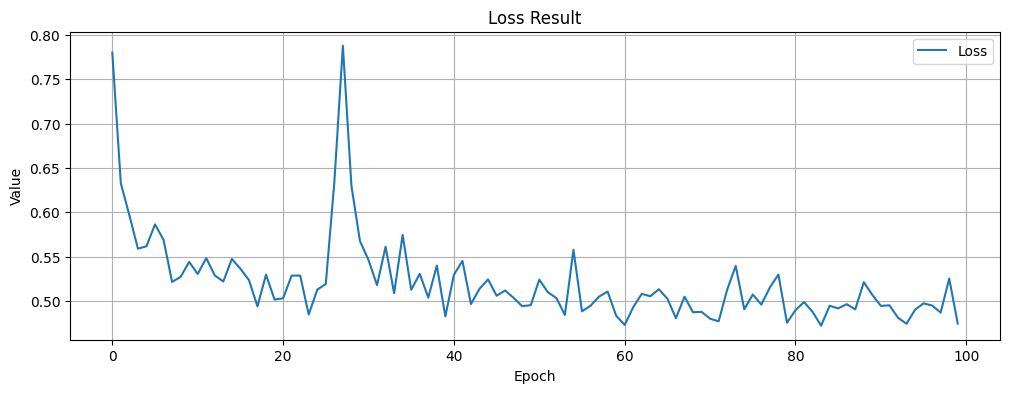

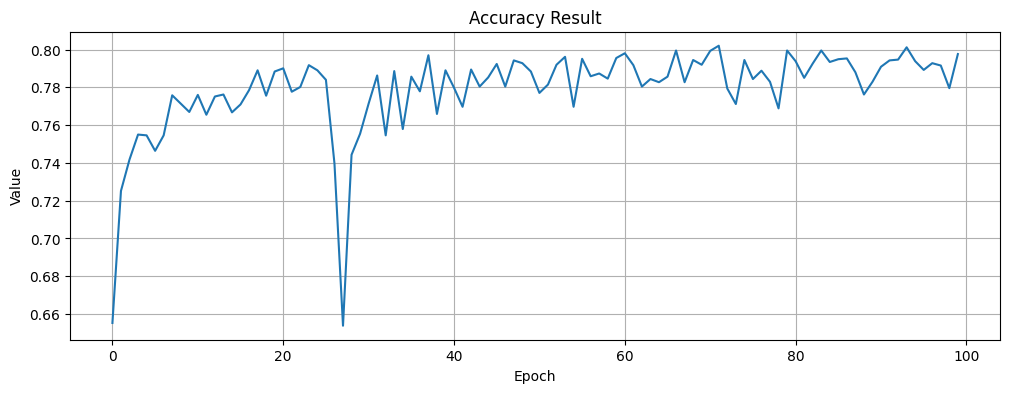

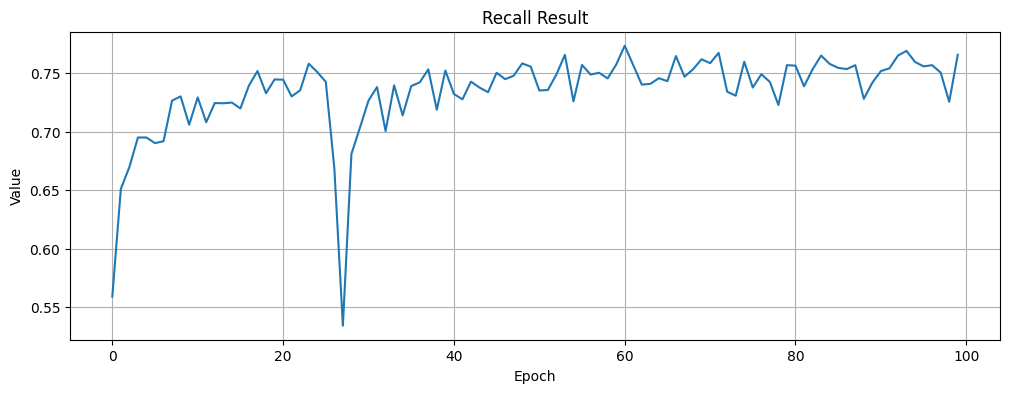

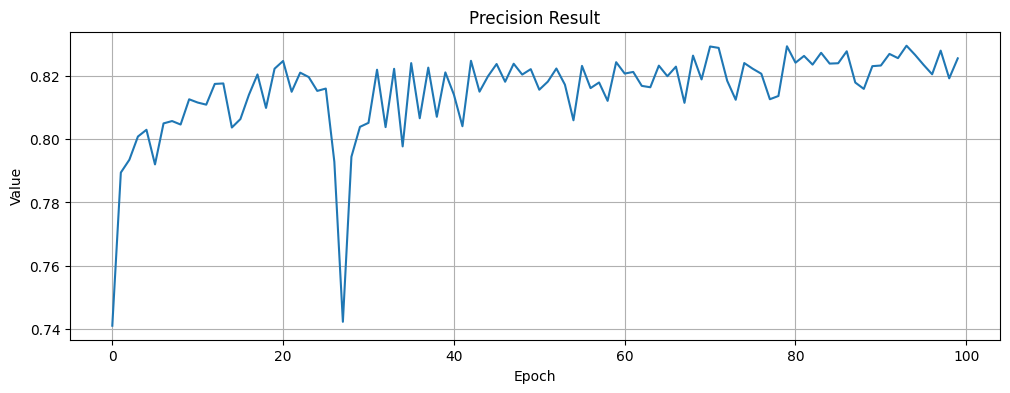

Train result:
Test result:
[0.3254290521144867, 0.8672268986701965, 0.8832752704620361, 0.8521008491516113]


In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test) 

plot_model_performance(fit_result)
# plot_model_performance(evaluate_result)

print("Train result:")
print(fit_result)

print("Test result:")
print(evaluate_result)

save_lstm_model(model)

In [7]:
latest_train_metrics = [value[-1] for key, value in fit_result.history.items()]

print("Train result:")
print("accuracy, loss, precision, recall")
print(latest_train_metrics)

print("Test result:")
print("loss, accuracy, precision, recall")
print(evaluate_result)

Train result:
accuracy, loss, precision, recall
[0.7976065278053284, 0.4747219681739807, 0.8256340622901917, 0.7654839158058167]
Test result:
loss, accuracy, precision, recall
[0.3254290521144867, 0.8672268986701965, 0.8832752704620361, 0.8521008491516113]


In [8]:
model = load_lstm_model()

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


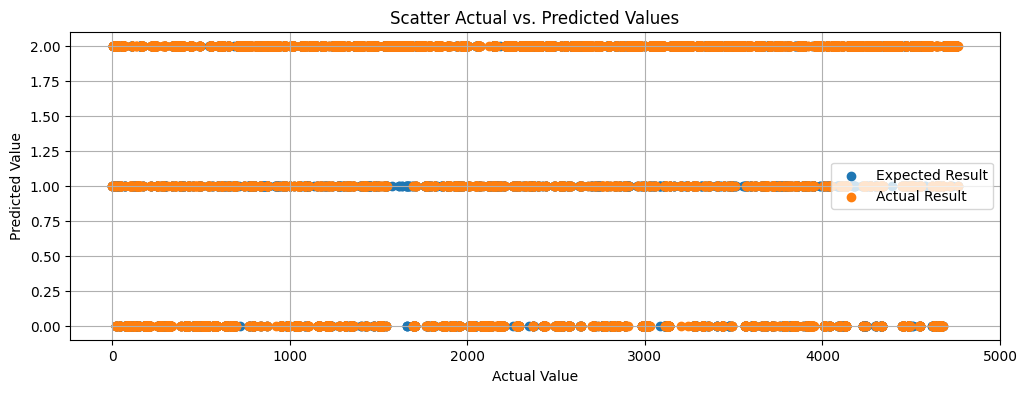

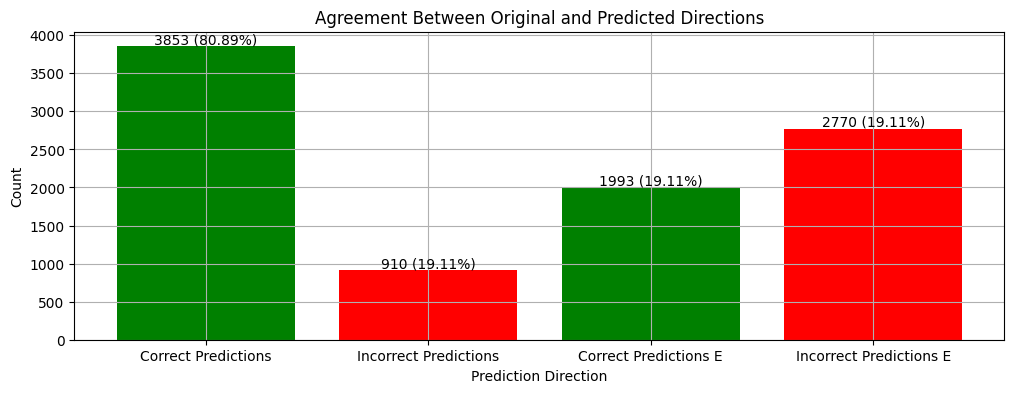

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.18627824, 0.06327119, 0.04288464, ..., 0.00366858, 0.01387652,
        0.23626864], dtype=float32))

In [9]:
predictions_train = model.predict(x_train)

# plot_scatter_data(y_train[:, 0], predictions_train[:, 0])
y_train_classes = np.argmax(y_train, axis=1)
predictions_train_classes = np.argmax(predictions_train, axis=1)

plot_scatter_data(y_train_classes, predictions_train_classes)
plot_direction_comparison(y_train_classes, predictions_train_classes)

y_train[:, 0], predictions_train[:, 0]

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


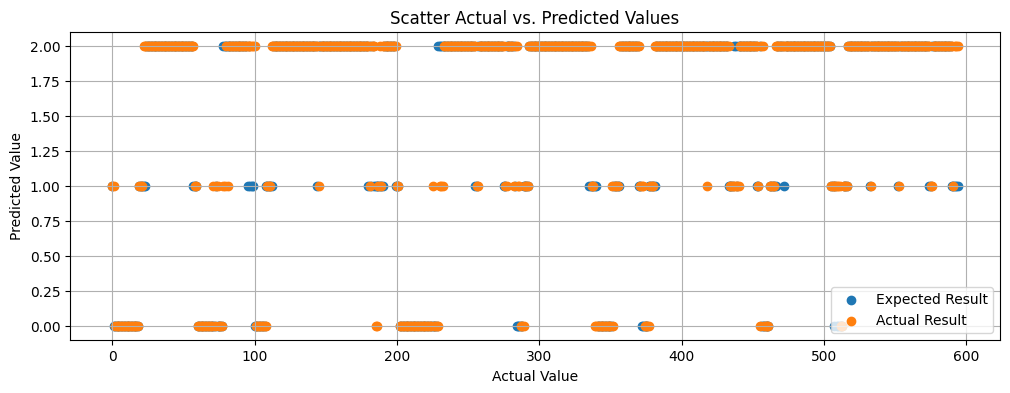

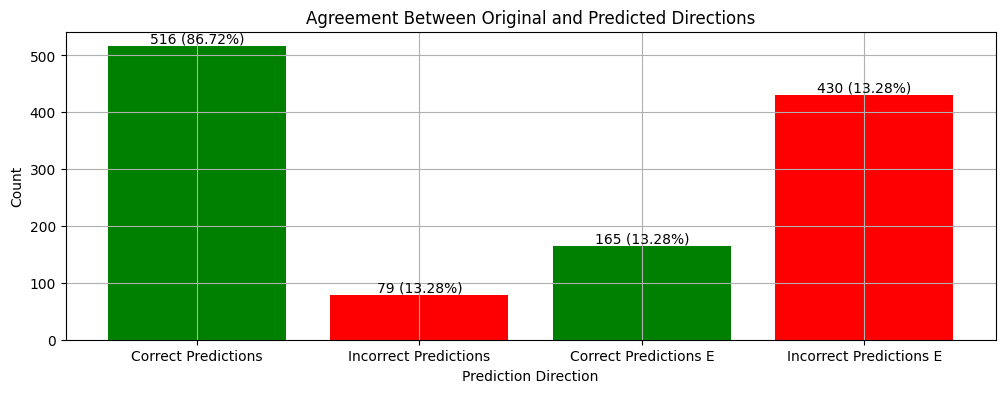

In [10]:
predictions_test = model.predict(x_test)

y_test_classes = np.argmax(y_test, axis=1)
predictions_test_classes = np.argmax(predictions_test, axis=1)

plot_scatter_data(y_test_classes, predictions_test_classes)
plot_direction_comparison(y_test_classes, predictions_test_classes)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[3.6811665e-01 3.2714713e-01 3.0473623e-01]
 [6.5381384e-01 2.8059486e-01 6.5591268e-02]
 [9.0059775e-01 9.6379027e-02 3.0232628e-03]
 ...
 [6.1292993e-04 1.5356963e-02 9.8403013e-01]
 [6.1273231e-04 1.5353498e-02 9.8403382e-01]
 [6.1268487e-04 1.5353217e-02 9.8403406e-01]]
[0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 0 1 1 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2
 2 2 2 1 1 2 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 2 1 1 0 1 2 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 2 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1
 2 2 2 2 

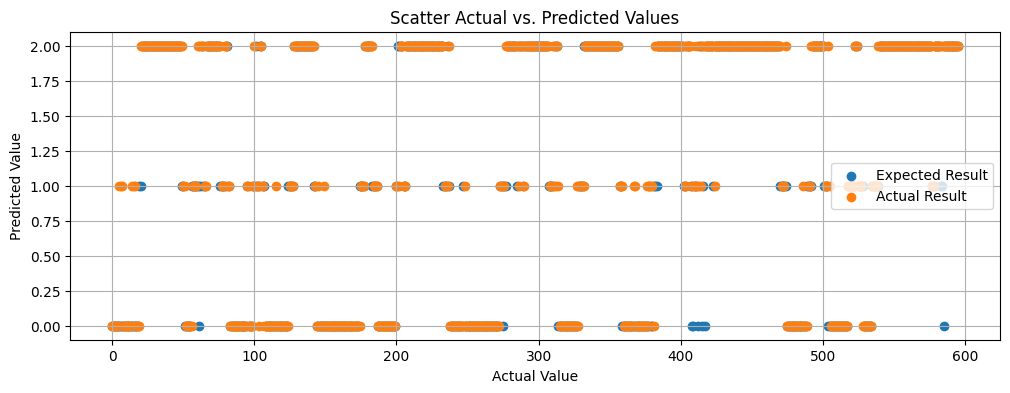

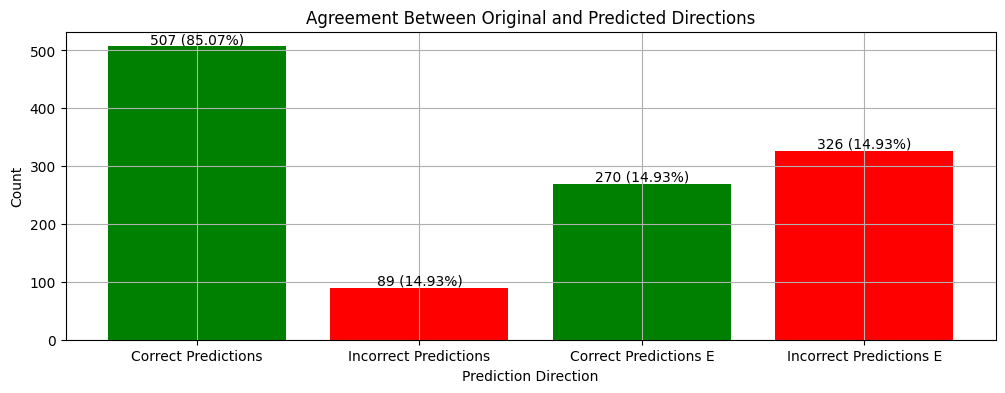

In [11]:
predictions = model.predict(x_predict)


y_predictions_classes = np.argmax(y_predict, axis=1)
predictions_classes = np.argmax(predictions, axis=1)

print(predictions)
print(predictions_classes)


plot_scatter_data(y_predictions_classes, predictions_classes)
plot_direction_comparison(y_predictions_classes, predictions_classes)